In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import os
# os.environ["KERAS_BACKEND"] = "theano"
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras import backend as K
from keras.utils.vis_utils import plot_model


Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
data_augmentation = True
batch_size = 32

num_predictions = 20

In [3]:
X_train.shape

(50000, 32, 32, 3)

D:\Anacoda\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[2]')

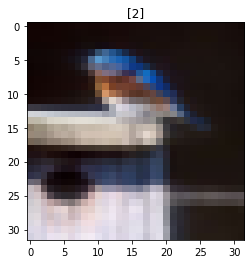

In [4]:
plt.imshow(X_train[13])
plt.title(Y_train[13])

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
X_train.shape

(50000, 32, 32, 3)

In [6]:
num_classes = 10
Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)

In [7]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape= X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


W0830 16:17:08.477899  6056 deprecation_wrapper.py:119] From D:\Anacoda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 16:17:08.517870  6056 deprecation_wrapper.py:119] From D:\Anacoda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 16:17:08.523867  6056 deprecation_wrapper.py:119] From D:\Anacoda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 16:17:08.587828  6056 deprecation_wrapper.py:119] From D:\Anacoda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0830 16:17:08.591826  6056 deprecation_wrapper.py:119] From D:\Anacoda\lib\site-packages\keras\backend\tensorflow_backend.py:133: The 

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [10]:
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

W0830 16:17:08.971727  6056 deprecation_wrapper.py:119] From D:\Anacoda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0830 16:17:08.985717  6056 deprecation_wrapper.py:119] From D:\Anacoda\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
if not data_augmentation:
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=epochs,
              validation_data=(X_test, Y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation...')
    datagen = ImageDataGenerator(
        featurewise_center=False,  # mean = 0
        samplewise_center=False,  # each sample mean = 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its
        zca_whitening=False,  # apply whitening
        zca_epsilon=1e-06,  # epsilon
        rotation_range=0,  # randomly rotate ( 0 to 180)
        width_shift_range=0.1,  # randomly shift horizontally
        height_shift_range=0.1,  # randomly shift vertically
        shear_range=0.,  # range for random shear
        zoom_range=0.,  # random zoom
        channel_shift_range=0.,  # range for random channel shift
        fill_mode='nearest',
        cval=0.,  # constant
        horizontal_flip=True,  # random flip
        vertical_flip=True,
        rescale=None,  # rescaling factor
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    datagen.fit(X_train)
    # Fitting the model
    model.fit_generator(datagen
                        .flow(X_train, Y_train, batch_size=batch_size),
                        epochs=50,
                        steps_per_epoch = 60000//64,
                        validation_data=(X_test, Y_test),
                        workers=4)

Using real-time data augmentation...


W0830 16:17:09.612840  6056 deprecation.py:323] From D:\Anacoda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
 29/937 [..............................] - ETA: 5:46 - loss: 2.3089 - acc: 0.0970

KeyboardInterrupt: 

In [ ]:
#train_generator = datagen.flow(X_train, Y_train, batch_size=batch_size)
#test_generator = testgen.flow(X_test, Y_test, batch_size=batch_size)

In [ ]:
#model.fit_generator(train_generator, epochs=50, steps_per_epoch = 60000//64,
 #                  validation_data = test_generator, validation_steps = 1000)

In [12]:
model.save_weights('data_visualize.h5')

In [13]:
model.load_weights('data_visualize.h5')

In [14]:
model.evaluate(X_test, Y_test, batch_size=batch_size)

10000/10000 [==============================] - 26s 3ms/step


[2.2922454120635987, 0.1189]

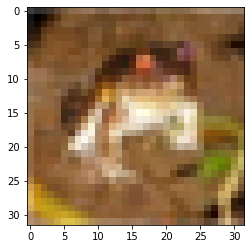

In [15]:
img_to_visualize = X_train[0]
plt.imshow(img_to_visualize)
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

In [16]:
def layer_to_visualize(layer):
    convout1 = K.function([model.layers[0].input, K.learning_phase()], [layer.output])
    def convout1_f(X):
        return convout1([X, 0])
    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)
    print("Shape of conv", convolutions.shape)
    
    return convolutions 

Shape of conv (30, 30, 32)


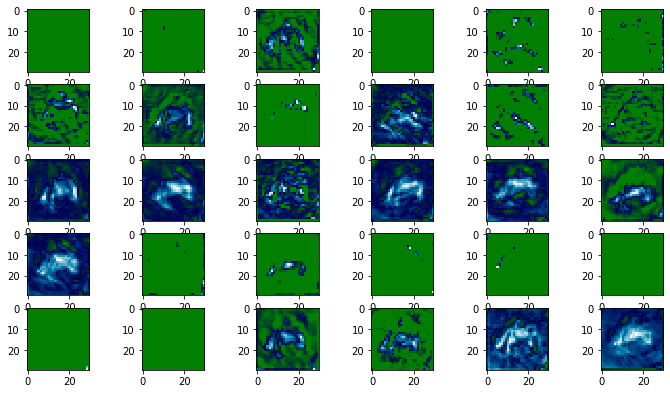

In [17]:
convolution = layer_to_visualize(model.layers[-12])
figure = plt.figure(figsize=(12,8))
for i in range(len(convolution)):
    ax = figure.add_subplot(6 , 6, i+1)
    ax.imshow(convolution[:,:,i], cmap='ocean')

Shape of conv (30, 30, 32)


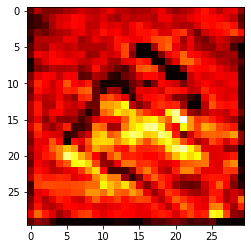

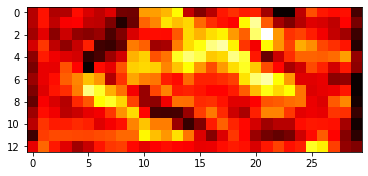

In [18]:
сonvolution = layer_to_visualize(model.layers[-12])
plt.imshow(convolution[:,:,9], cmap='hot')
plt.show()
maximum = max(convolution[:,:,9].flatten())*0.65

l = []

for i in convolution[:,:,9]:
    if max(i) > maximum:
        l.append(i)
        
plt.imshow(l, cmap='hot')        
